# Lab: K-Nearest Neighbours Classifier

In [1]:
#Install necessary libraries
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikt-learn==1.6.0
!pip install seaborn==0.13.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 3.2 MB/s  0:00:01 eta 0:00:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.3.2
    Uninstalling numpy-2.3.2:
      Successfully uninstalled numpy-2.3.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 5.5 MB/s  0:00:02 eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.2
    Uninstalling pandas-2.3.2:
      Successfully uninstalled pandas-2.3.2
ERROR: Could not find a version that satisfies the requirement scikt-learn==1.6.0 (from versions: none)
ERROR: No matching distribution found for scikt-learn==1.6.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
%matplotlib inline

## Load data

Target field - custcat
1. Basic Service
2. E-Service
3. Plus Service
4. Total Service

In [7]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/teleCust1000t.csv')
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


## Data Visualization and Analysis

In [8]:
df['custcat'].value_counts()

custcat
3    281
1    266
4    236
2    217
Name: count, dtype: int64

<Axes: >

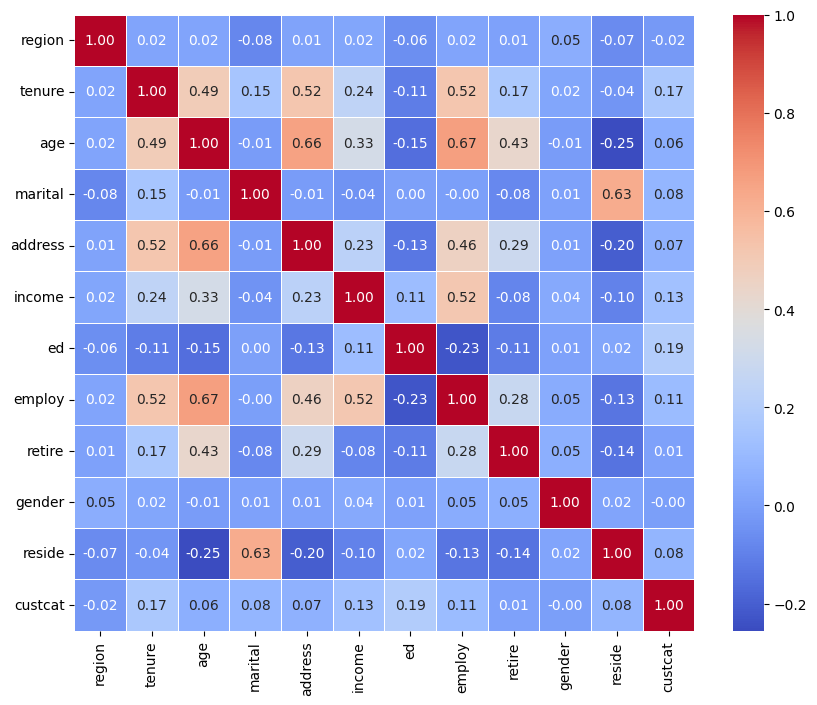

In [10]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

In [11]:
correlation_values = abs(df.corr()['custcat'].drop('custcat')).sort_values(ascending=False)
correlation_values

ed         0.193864
tenure     0.166691
income     0.134525
employ     0.110011
marital    0.083836
reside     0.082022
address    0.067913
age        0.056909
region     0.023771
retire     0.008908
gender     0.004966
Name: custcat, dtype: float64

In [13]:
X = df.drop('custcat', axis=1)
y = df['custcat']

## Normalize Data

In [14]:
X_norm = StandardScaler().fit_transform(X)

## Train Test Split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=4)

## KNN Classification
### Training

In [17]:
k = 3

knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_model = knn_classifier.fit(X_train, y_train)

### Predicting

In [18]:
yhat = knn_model.predict(X_test)

### Accuracy evaluatioin

In [19]:
print("Test set Accuracy: ", accuracy_score(y_test, yhat))

Test set Accuracy:  0.315
